## Used only for visualization process

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.neighbors import LocalOutlierFactor

### Data Directory

In [2]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [3]:
input_file = INPUT_DIR + 'train_FD001.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [4]:
df.head()

unit  time_cycles  setting1  setting2  setting3  meas01  meas02   meas03  \
0     1            1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1     1            2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2     1            3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3     1            4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4     1            5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   

    meas04  meas05   ...    meas17  meas18  meas19  meas20   meas21  meas22  \
0  1400.60   14.62   ...       392    2388   100.0   39.06  23.4190     NaN   
1  1403.14   14.62   ...       392    2388   100.0   39.00  23.4236     NaN   
2  1404.20   14.62   ...       390    2388   100.0   38.95  23.3442     NaN   
3  1401.87   14.62   ...       392    2388   100.0   38.88  23.3739     NaN   
4  1406.22   14.62   ...       393    2388   100.0   38.90  23.4044     NaN   

   meas23  meas24  meas25  meas26  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN  

[5 rows x 31 columns]

### Features to use

In [5]:
id_cols = ['unit', 'time_cycles']
feature_set = ['setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas20', 
              'meas21']

In [6]:
cols = feature_set + id_cols

In [7]:
print(cols)

['setting1', 'setting2', 'setting3', 'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas20', 'meas21', 'unit', 'time_cycles']


In [8]:
df = df[cols]

In [9]:
df.head()

setting1  setting2  setting3  meas01  meas02   meas03   meas04  meas05  \
0   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   14.62   
1    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   14.62   
2   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   14.62   
3    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   14.62   
4   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   14.62   

   meas06  meas07     ...       meas12   meas13   meas14  meas15  meas16  \
0   21.61  554.36     ...       521.66  2388.02  8138.62  8.4195    0.03   
1   21.61  553.75     ...       522.28  2388.07  8131.49  8.4318    0.03   
2   21.61  554.26     ...       522.42  2388.03  8133.23  8.4178    0.03   
3   21.61  554.45     ...       522.86  2388.08  8133.83  8.3682    0.03   
4   21.61  554.00     ...       522.19  2388.04  8133.80  8.4294    0.03   

   meas17  meas20   meas21  unit  time_cycles  
0     392   39.06  23.4190     1            1  
1     392   39.00  23.4236     1            2  
2     390   38.95  23.3442     1            3  
3     392   38.88  23.3739     1            4  
4     393   38.90  23.4044     1            5  

[5 rows x 24 columns]

### Standardizing the dataset

In [10]:
# Preprocessing the dataset
X = df[feature_set]

normalized_X = preprocessing.normalize(X)

In [11]:
normalized_X

array([[-5.44299580e-08, -3.11028331e-08,  7.77570829e-03, ...,
         3.04807765e-02,  3.03719166e-03,  1.82099312e-03],
       [ 1.47801005e-07, -2.33370007e-08,  7.77900024e-03, ...,
         3.04936809e-02,  3.03381009e-03,  1.82212190e-03],
       [-3.34316004e-07,  2.33243723e-08,  7.77479078e-03, ...,
         3.03216840e-02,  3.02828101e-03,  1.81496271e-03],
       ...,
       [ 3.10541950e-08,  0.00000000e+00,  7.76354875e-03, ...,
         3.08989240e-02,  2.98430814e-03,  1.78043792e-03],
       [-8.53696531e-08,  2.32826327e-08,  7.76087756e-03, ...,
         3.06554664e-02,  2.97164002e-03,  1.78996880e-03],
       [-2.48536756e-07, -3.88338682e-08,  7.76677364e-03, ...,
         3.07564236e-02,  2.98011104e-03,  1.79041219e-03]])

# ------- Do not run the following - START --

In [12]:
def reach_dist(idx_o, idx_o_dash, X_dist, knn_dist):
    return max(X_dist[idx_o][idx_o_dash], max(knn_dist[idx_o]))

### Find the Local Reachability Distance and Local Outlier Factor

In [21]:
def get_lrd_lof(k, X_dist):
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    pred_labels = clf.fit_predict(X)
    knn_dist, knn_indices = clf.kneighbors(X=X, n_neighbors=k, return_distance=True)
    lrd = list()
    for element_idx in range(0, len(knn_indices)):
        knn_elements_indices = knn_indices[element_idx]
        lrd_val = 0
        for neighbour_idx in knn_elements_indices:
            lrd_val += reach_dist(neighbour_idx, element_idx, X_dist, knn_dist)
        lrd_val /= k
        lrd.append(lrd_val)

    lof = list()
    for element_idx in range(0, len(knn_indices)):
        knn_elements_indices = knn_indices[element_idx]
        lof_val = 0
        for neighbour_idx in knn_elements_indices:
            lof_val += lrd[neighbour_idx]

        lof_val /= lrd[element_idx]
        lof_val /= k

        lof.append(lof_val)
        
    return lof, lrd

### Compute Distance Matrix

In [22]:
X_dist = distance_matrix(X, X)

### Grid search for value of k

In [ ]:
k_list = [500, 1000, 2000, 3000, 4000, 5000]
# k_list = [3, 4, 5]

print('| k | Outliers | Time(s) |')
print('| -- | -- | -- |')
for k in k_list:
    tic = time.time()
    lof, lrd = get_lrd_lof(k, X_dist)
    outliers_count = len([i for i in lof if i > 1.0])
    print('|', k, '|', outliers_count, '|', (time.time()-tic), '|')

| k | Outliers | Time(s) |
| -- | -- | -- |
| 500 | 6303 | 30955.6791639328 |
| 1000 | 5580 | 979.8393778800964 |
| 2000 | 5927 | 7498.891983985901 |
| 3000 | 6133 | 8654.42366695404 |
| 4000 | 6386 | 16438.418803215027 |


### Run LOF for specific value of k

In [ ]:
k = 3000

tic = time.time()
lof, lrd = get_lrd_lof(k, X_dist)
outliers_count = len([i for i in lof if i > 1.0])
print('Num outliers = ', outliers_count, '\tTime taken = ', (time.time()-tic), 'secs')

In [23]:
df['lof'] = lof
df['lrd'] = lrd

## Write down the results into csv

In [24]:
op_file = OUTPUT_DIR + 'fd001_lof_results_k_' + str(k) + '.csv'
with open(op_file, 'wb') as f:
    df.to_csv(op_file, header=True, index=False, sep=',')

print('Writing to ', op_file)

Writing to  ../data/interim/fd001_lof_results_k_3.csv


# ------- Do not run the following - END --

### Read the file that was run on the server

In [2]:
INPUT_DIR = '../data/interim/'
filename = 'fd001_lof_1000.csv'

df = pd.read_csv(INPUT_DIR+filename, sep=',')

In [3]:
df.columns.values

array(['Unnamed: 0', 'setting1', 'setting2', 'setting3', 'meas01',
       'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07',
       'meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13',
       'meas14', 'meas15', 'meas16', 'meas17', 'meas20', 'meas21', 'unit',
       'time_cycles', 'lof', 'lrd'], dtype=object)

In [4]:
df.head()

Unnamed: 0  setting1  setting2  setting3  meas01  meas02   meas03   meas04  \
0           0   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1           1    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2           2   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3           3    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4           4   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

   meas05  meas06    ...      meas14  meas15  meas16  meas17  meas20   meas21  \
0   14.62   21.61    ...     8138.62  8.4195    0.03     392   39.06  23.4190   
1   14.62   21.61    ...     8131.49  8.4318    0.03     392   39.00  23.4236   
2   14.62   21.61    ...     8133.23  8.4178    0.03     390   38.95  23.3442   
3   14.62   21.61    ...     8133.83  8.3682    0.03     392   38.88  23.3739   
4   14.62   21.61    ...     8133.80  8.4294    0.03     393   38.90  23.4044   

   unit  time_cycles       lof       lrd  
0     1            1  0.893682  9.002000  
1     1            2  0.977734  8.549904  
2     1            3  1.021791  7.216794  
3     1            4  0.972299  8.292083  
4     1            5  0.981232  7.531372  

[5 rows x 27 columns]

## Plot the graph for each feature

In [8]:
import math

def plot_graphs_lof(df, feature, units_per_graph, num_groundtruth_outliers):
        
    colors = ['b', 'r', 'c', 'm', 'g', 'k', 'y']
    xlabel = 'Time'
    ylabel = 'Value'

    unit_start = 0
    time_col = 'time_cycles'

    total_plots = math.ceil(100 / units_per_graph)
    cols_plot = 2
    rows_plot = math.ceil(total_plots/cols_plot)
    
    print('Rows', rows_plot, 'Total', total_plots)

    plt.rcParams['figure.figsize'] = [cols_plot * 10, rows_plot * 7] # Size of the plots        
    plt.figure()
    
    # unq_labels = np.unique(df['labels'])
    # unq_labels.sort()
    
    df1 = df.sort_values('lof',ascending = False).head(num_groundtruth_outliers).copy()
    min_score = min(df1['lof'])
   
    idx = 1

    for i in range(total_plots):

        start_unit = (i) * units_per_graph + 1
        end_unit = start_unit + units_per_graph - 1

        plt.subplot(rows_plot, cols_plot, i+1)
        plt.ylabel(feature)
        plt.xlabel(time_col)
        plt.xticks(rotation=45)
        plt.title('Units ' + str(start_unit) + '-' + str(end_unit))

        for current_unit in range(start_unit, end_unit+1, 1):
            
            color = colors[current_unit%len(colors)]
            
            df_sub = df.loc[df['unit'] == current_unit]
            df_sub = df_sub[[time_col, feature, 'lof']]            
            
            x = df_sub['time_cycles']
            y = df_sub[feature]

            plt.plot(x, y, c='b', linewidth=1)
            
            # Only scatter plot the outliers              
            df_cluster = df_sub.loc[df_sub['lof'] >= min_score]
            
            for idx, outlier_row in df_cluster.iterrows():
                x = np.array(outlier_row[time_col])
                y = np.array(outlier_row[feature])
            
                size = (float(outlier_row['lof']) - 1.0) * 100 * 10 # 10 is the scaling factor for the dots to increase the size
#                 print(size)
                alpha = 1
                plt.scatter(x, y, c='b', alpha=alpha, s=size, label='Outliers')

    plt.show()

Rows 50 Total 100


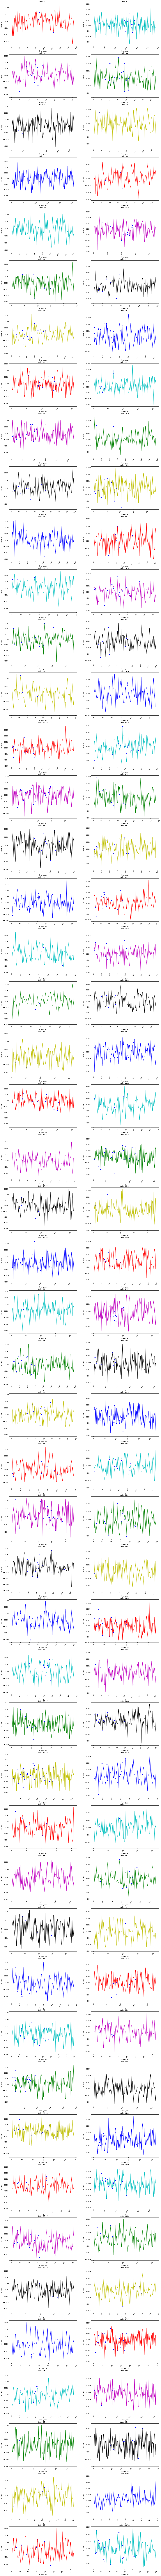

In [9]:
feature = 'setting1'
plot_graphs_lof(df=df, feature=feature, units_per_graph=1, num_groundtruth_outliers=1000)

Rows 50 Total 100


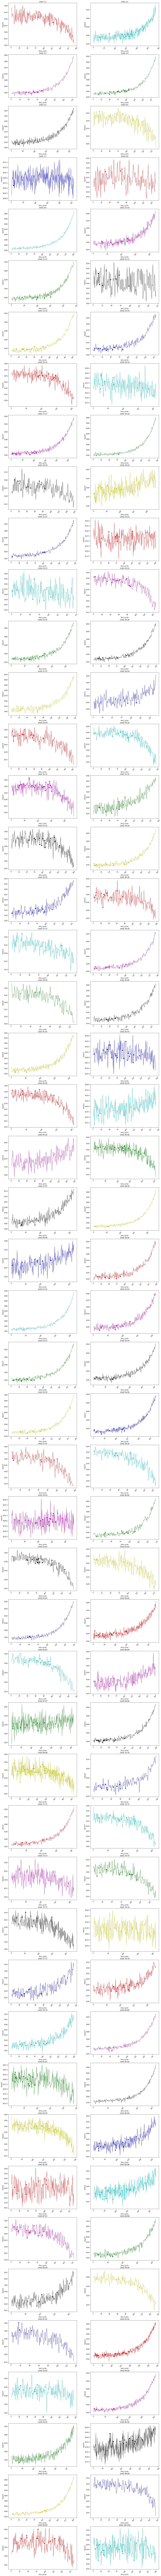

In [7]:
feature = 'meas14'
plot_graphs_lof(df=df, feature=feature, units_per_graph=1, num_groundtruth_outliers=1000)